In [1]:
import os
import pandas as pd
import numpy as np
import cv2

In [2]:
os.chdir('../')

In [3]:
df = pd.read_csv('data/raw/A4C/VolumeTracings_new.csv')
split = pd.read_csv('data/raw/A4C/FileList_new.csv')

In [4]:
grouped = df.groupby(['FileName', 'Frame'])

In [5]:
sp = ['train', 'val', 'test']

for s in sp:
    os.makedirs(f'data/processed/u-net/{s}/images', exist_ok=True)
    os.makedirs(f'data/processed/u-net/{s}/masks', exist_ok=True)

In [6]:
for (filename, frame_num), group in grouped:

    video_path = f'data/raw/A4C/videos/{filename}'
    cap = cv2.VideoCapture(video_path)

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num-1)

    ret, frame = cap.read()

    if not ret:
        print(f"Failed to read frame {frame_num} from {filename}")
        continue

    sp = str.lower(split[split['FileName'] == filename[:-4]]['Split'].values[0])


    image_path = f'data/processed/u-net/{sp}/images/{filename}_frame{frame_num}.png'

    cv2.imwrite(image_path, frame)

    mask = np.zeros(frame.shape[:2], dtype=np.uint8) 
    points = group[["X", "Y"]].values.astype(int)
    cv2.fillPoly(mask, [points], color=255)
    
    mask_path = f'data/processed/u-net/{sp}/masks/{filename}_frame{frame_num}_mask.png'
    cv2.imwrite(mask_path, mask)
    
    cap.release()

### Visual Inspection:

In [7]:
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread('data/processed/u-net/train/images/CR3dca6a0-CR3dca87f-000033.avi_frame35.png')
mask = cv2.imread('data/processed/u-net/train/masks/CR3dca6a0-CR3dca87f-000033.avi_frame35_mask.png')

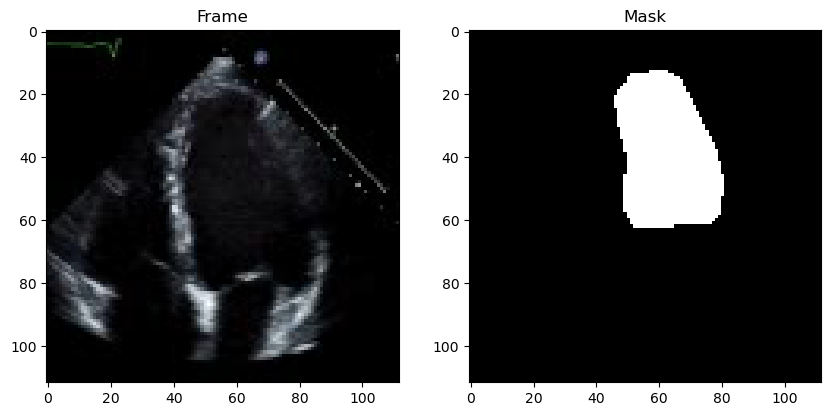

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.imshow(frame)
plt.title("Frame")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.show()